In [21]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
data_path = os.path.join("..", "data", "01_raw")

Is there any correlation between soil, CO2 and fertilizer with the yields?

In [3]:
train_solutions_wheat_df = pd.read_parquet(os.path.join(data_path, 'train_solutions_wheat.parquet'))

In [4]:
soil_co2_wheat_train_df = pd.read_parquet(os.path.join(data_path, 'soil_co2_wheat_train.parquet'))

In [12]:
joined_df = train_solutions_wheat_df.join(soil_co2_wheat_train_df) 


In [ ]:
corr_matrix = joined_df[['yield', 'lon', 'lat', 'texture_class', 'real_year', 'co2', 'nitrogen']].corr()

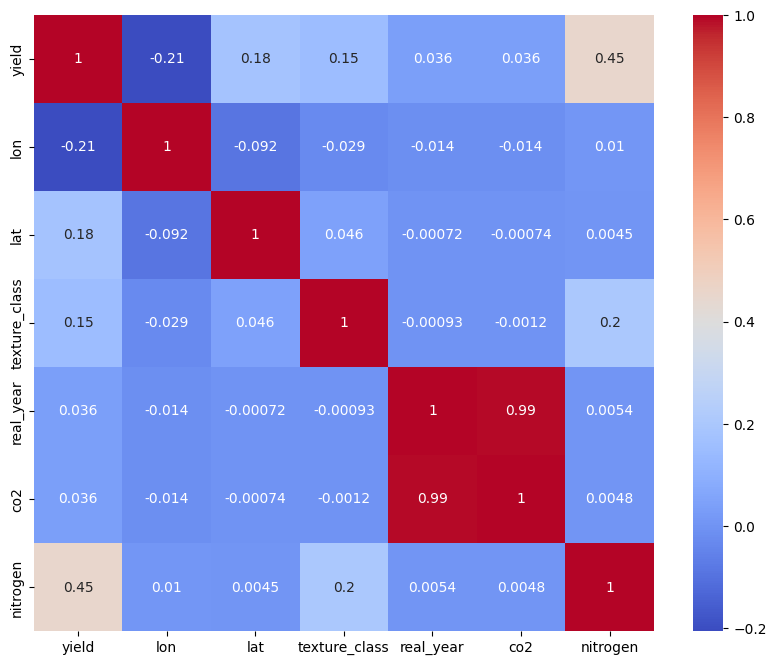

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Yield is highly correlated with fertilization (r2=0.45), then a bit with the texture class as a numerical variable (r2=0.15).  
It is also correlated with the latitude and longitude (r2=0.18 and -0.21).  
It doesn't seem like it's correlated with the year or the level of CO2.

Soil texture is correlated with fertilization (r2=0.2). We should then be careful and be sure we want to use both variables in our model.

- We could also try to look for a correlation between texture_class as a categorical value not ordered.
- We could create another variable to group latitude and longitude and assess the correlation again.  

---

Is there any correlation between texture_class as a categorical not ordered variable?

In [23]:
groups = joined_df.groupby('texture_class')['yield'].apply(list)
F_value, p_value = f_oneway(*groups)
print(f"F-value: {F_value}, p-value: {p_value}")

F-value: 1618.0612918510628, p-value: 0.0


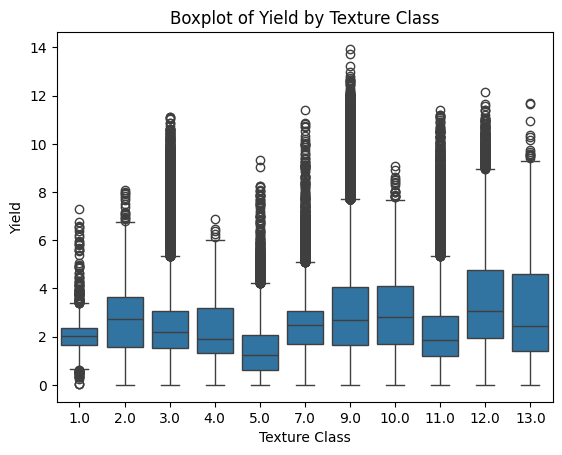

In [24]:
sns.boxplot(x='texture_class', y='yield', data=joined_df)
plt.title('Boxplot of Yield by Texture Class')
plt.xlabel('Texture Class')
plt.ylabel('Yield')
plt.show()

Seems like there is, we could then use this variable as a not ordered categorical variable in the model.

---

Is there a good way to group latitude and longitude in a single variable and have it correlated with the yield?